In [1]:
# # Import data  and perform preprocessing

import os as os

In [2]:
os.chdir("C:\\Users\\kunal\\Desktop\\Training 1\\Logistic regression")



In [3]:
os.getcwd()

'C:\\Users\\kunal\\Desktop\\Training 1\\Logistic regression'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'Credit_Risk_Test_data.csv',
 'Credit_Risk_Train_data.csv',
 'Credit_Risk_Validate_data.csv',
 'Logistic_Regression_Final-Copy1.ipynb',
 'Logistic_Regression_Final.ipynb',
 'Log_reg_Imarticus_New.py',
 'Log_ROC.png']

In [5]:
#Import the relevant packages



import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#list the files in the w/d
os.listdir()

['.ipynb_checkpoints',
 'Credit_Risk_Test_data.csv',
 'Credit_Risk_Train_data.csv',
 'Credit_Risk_Validate_data.csv',
 'Logistic_Regression_Final-Copy1.ipynb',
 'Logistic_Regression_Final.ipynb',
 'Log_reg_Imarticus_New.py',
 'Log_ROC.png']

In [51]:
#read the data set

cr_train=pd.read_csv('Credit_Risk_Train_data.csv')

cr_test=pd.read_csv("Credit_Risk_Test_data.csv")

cr_valid=pd.read_csv("Credit_Risk_Validate_data.csv")

In [52]:
#check the dimension of the dataset

print("Dimension of the training data",cr_train.shape)
print("Dimension of the validation data",cr_valid.shape)
print("Dimension of the test data",cr_test.shape)


Dimension of the training data (614, 13)
Dimension of the validation data (367, 13)
Dimension of the test data (367, 12)


In [53]:
cr_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
cr_valid.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [55]:
cr_valid.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')

In [56]:
cr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [57]:
cr_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  outcome            367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [58]:
#Rename the column outcome to Loan status
cr_valid.rename(columns={"outcome":"Loan_Status"},inplace=True)


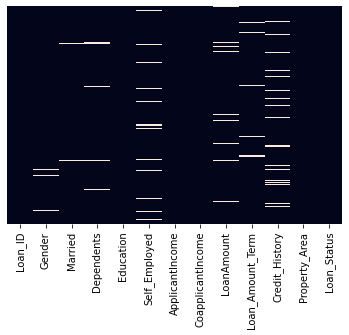

In [59]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_train.isnull(), yticklabels=False,cbar=False)

plt.show()

In [60]:
cr_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
cr_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [62]:
cr_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [63]:
cr_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [64]:
cr_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [65]:
cr_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [66]:
cr_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [67]:
#Imputation of categorical Variables for training data

cr_train['Gender'].fillna('Male',inplace=True)

cr_train['Married'].fillna('Yes',inplace=True)

cr_train['Dependents'].fillna('0',inplace=True)

cr_train['Education'].fillna('Graduate',inplace=True)

cr_train['Self_Employed'].fillna('No',inplace=True)

cr_train['Credit_History'].fillna(1,inplace=True)

In [68]:

#summing up all the null values in each column/variable
cr_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
#Compute the median value for loan amount

np.nanmedian(cr_train['LoanAmount'])

128.0

In [70]:
#Compute the median value for Loan amount term

np.nanmedian(cr_train['Loan_Amount_Term'])

360.0

In [71]:
#Imputation for Loan amount and Loan amount term

cr_train['LoanAmount'].fillna(128.0,inplace=True)

cr_train['Loan_Amount_Term'].fillna(360.0,inplace=True)


In [72]:
#Creating the dummy variables and dropping the old column
cr_train_dummy_cod=pd.get_dummies(cr_train.drop(['Loan_ID'],axis=1),drop_first=True)


In [73]:
cr_train_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    uint8  
 6   Married_Yes              614 non-null    uint8  
 7   Dependents_1             614 non-null    uint8  
 8   Dependents_2             614 non-null    uint8  
 9   Dependents_3+            614 non-null    uint8  
 10  Education_Not Graduate   614 non-null    uint8  
 11  Self_Employed_Yes        614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
 14  Loan_Status_Y            6

In [74]:
cr_train_dummy_cod.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


<AxesSubplot:>

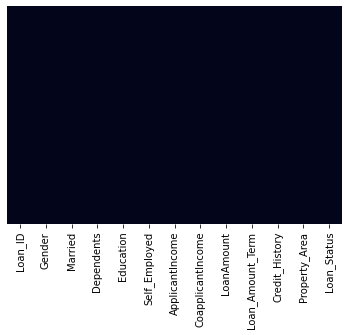

In [75]:
sns.heatmap(cr_train.isnull(), yticklabels=False,cbar=False)

<AxesSubplot:>

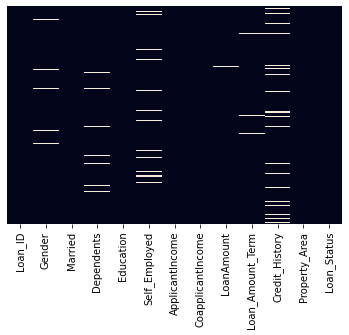

In [76]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_valid.isnull(), yticklabels=False,cbar=False)


In [77]:
#Imputation of categorical Variables for test data

cr_valid['Gender'].fillna('Male',inplace=True)

cr_valid['Married'].fillna('Yes',inplace=True)

cr_valid['Dependents'].fillna('0',inplace=True)

cr_valid['Education'].fillna('Graduate',inplace=True)

cr_valid['Self_Employed'].fillna('No',inplace=True)

cr_valid['Credit_History'].fillna(1,inplace=True)

In [78]:
#summing up all the missing values in each column
cr_valid.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [79]:
#Compute the median value for loan amount
np.nanmedian(cr_valid['LoanAmount'])

125.0

In [80]:
#Compute the median value for loan amount
np.nanmedian(cr_valid['Loan_Amount_Term'])



360.0

In [81]:
#Imputation for Loan amount and Loan amount term

cr_valid['LoanAmount'].fillna(125.0,inplace=True)

cr_valid['Loan_Amount_Term'].fillna(360.0,inplace=True)


<AxesSubplot:>

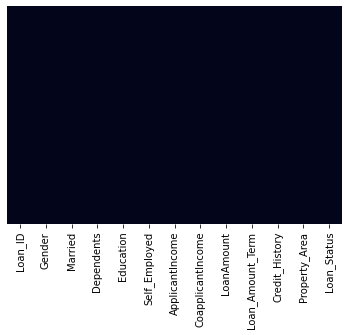

In [82]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_valid.isnull(), yticklabels=False,cbar=False)


In [83]:
cr_valid_dummy_cod=pd.get_dummies(cr_valid.drop(['Loan_ID'],axis=1),drop_first=True)
cr_valid_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Male              367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_1             367 non-null    uint8  
 8   Dependents_2             367 non-null    uint8  
 9   Dependents_3+            367 non-null    uint8  
 10  Education_Not Graduate   367 non-null    uint8  
 11  Self_Employed_Yes        367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
 14  Loan_Status_Y            3

<AxesSubplot:>

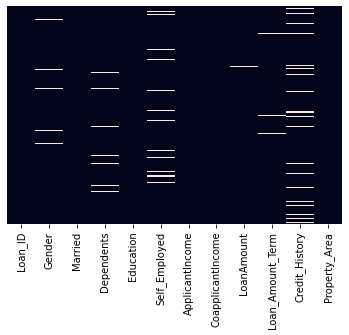

In [84]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_test.isnull(), yticklabels=False,cbar=False)

In [85]:
#Imputation of categorical Variables for test data

cr_test['Gender'].fillna('Male',inplace=True)

cr_test['Married'].fillna('Yes',inplace=True)

cr_test['Dependents'].fillna('0',inplace=True)

cr_test['Education'].fillna('Graduate',inplace=True)

cr_test['Self_Employed'].fillna('No',inplace=True)

cr_test['Credit_History'].fillna(1,inplace=True)


In [86]:
cr_test.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [87]:
#Compute the median value for loan amount

np.nanmedian(cr_test['LoanAmount'])


125.0

In [88]:
#Compute the median value for Loan amount term

np.nanmedian(cr_test['Loan_Amount_Term'])

360.0

In [89]:
#Imputation for Loan amount and Loan amount term

cr_test['LoanAmount'].fillna(125.0,inplace=True)

cr_test['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [90]:
cr_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

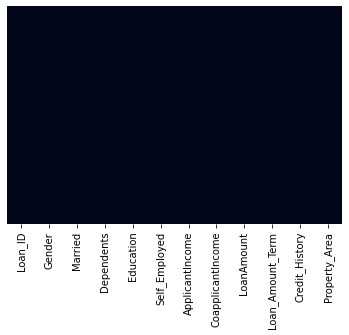

In [91]:
#using heatmap to figure out missing data if any
sns.heatmap(cr_test.isnull(), yticklabels=False,cbar=False)


In [92]:
cr_test_dummy_cod=pd.get_dummies(cr_test.drop(['Loan_ID'],axis=1),drop_first=True)

In [93]:
#Putting the validation data Target variable in a new object "Valid_Loan_Status"
Valid_Loan_Status=cr_valid_dummy_cod['Loan_Status_Y']
Valid_Loan_Status.value_counts()

1    290
0     77
Name: Loan_Status_Y, dtype: int64

In [94]:
#Dropping the column from the validation data set
del cr_valid_dummy_cod['Loan_Status_Y']


In [95]:
cr_valid_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Male              367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_1             367 non-null    uint8  
 8   Dependents_2             367 non-null    uint8  
 9   Dependents_3+            367 non-null    uint8  
 10  Education_Not Graduate   367 non-null    uint8  
 11  Self_Employed_Yes        367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
dtypes: float64(3), int64(2), u

In [96]:
# Descriptive statistics 

In [97]:
x=cr_train['ApplicantIncome']#subsetting the applicant income column and assigning to x


In [98]:
y=cr_train['LoanAmount']#subsetting the Loan amount column and assigning it to y

(0.0, 12000.0)

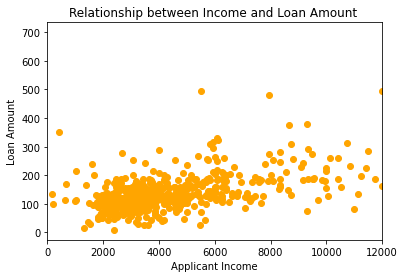

In [99]:
#check the relationship between the Income and Loan amount using a scatter plot
plt.scatter(x,y,color="orange")
plt.title("Relationship between Income and Loan Amount ")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.xlim(0,12000)

In [100]:
cr_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

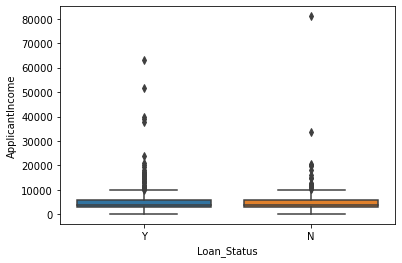

In [101]:
#Applicant Income and its impact on Loan approval 

sns.boxplot(y=cr_train['ApplicantIncome'],x=cr_train['Loan_Status']);plt.show()

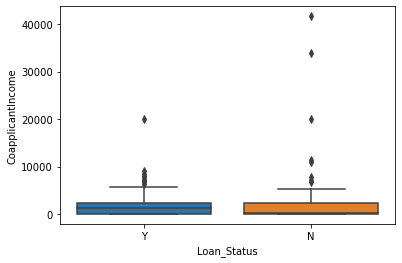

In [102]:
#Coapplicant Income and its impact on Loan approval 

sns.boxplot(y=cr_train['CoapplicantIncome'],x=cr_train['Loan_Status']);plt.show()

In [103]:
cr_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<AxesSubplot:>

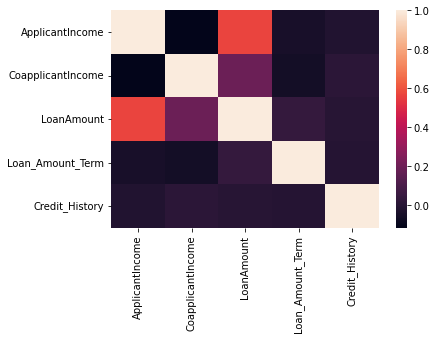

In [104]:
#Checking correlation between diff variables
sns.heatmap(cr_train.corr())

In [61]:
import matplotlib.pyplot as plt

In [62]:
#Checking correlation between diff variables
cr_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [63]:
#frequency table
cr_train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

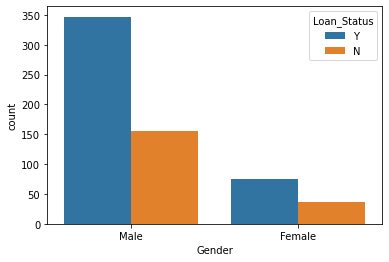

In [105]:
#do a count check for the categorical variable
sns.countplot(x="Gender",hue="Loan_Status",data=cr_train)
plt.show()



In [65]:
#frequency table
cr_train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

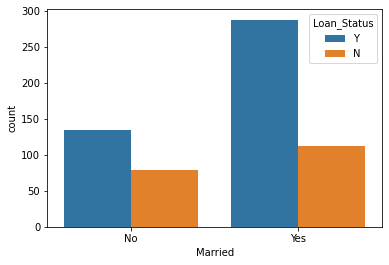

In [106]:
#do a count check for the categorical variable(Married)
sns.countplot(x="Married",hue="Loan_Status",data=cr_train)
plt.show()

In [107]:
#frequency table
cr_train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

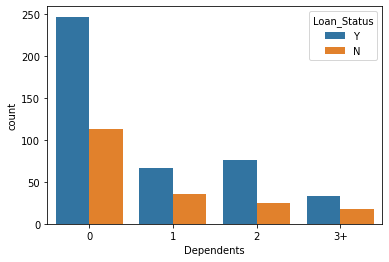

In [108]:
#do a count check for the categorical variable(Dependents)
sns.countplot(x="Dependents",hue="Loan_Status",data=cr_train)
plt.show()

In [69]:
#Central Tendency of income
cr_train['ApplicantIncome'].median()


3812.5

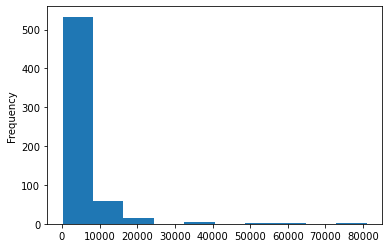

In [70]:
#histogram of the applicant income in the training dataset
cr_train['ApplicantIncome'].plot.hist()
plt.show()

<AxesSubplot:ylabel='Frequency'>

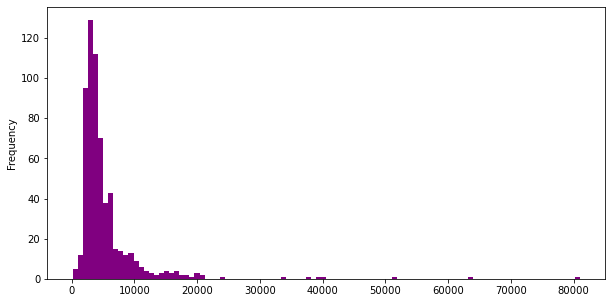

In [71]:
#effect of increasing the bin size 
#skewness evident
cr_train['ApplicantIncome'].plot.hist(bins=100,figsize=(10,5),color="purple")


In [72]:
#Crosstabulating the Gender and the loan status
pd.crosstab(cr_train['Gender'],cr_train['Loan_Status'])


Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


<AxesSubplot:xlabel='Gender', ylabel='count'>

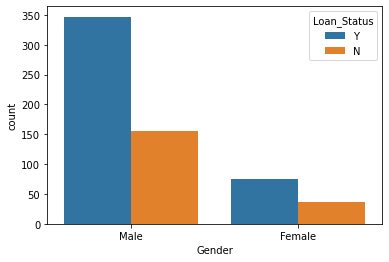

In [73]:
#Gender vs Loan approval status
sns.countplot(x="Gender",hue="Loan_Status",data=cr_train)


In [74]:
#Crosstabulating the Dependents and the loan status
pd.crosstab(cr_train['Dependents'],cr_train['Loan_Status'])


Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


<AxesSubplot:xlabel='Dependents', ylabel='count'>

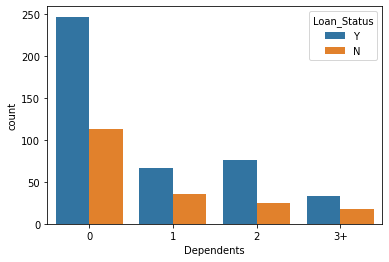

In [75]:
#Depenedents vs Loan status
sns.countplot(x="Dependents",hue="Loan_Status",data=cr_train)


In [76]:
#Crosstabulating the Education and the loan status
pd.crosstab(cr_train['Education'],cr_train['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [77]:
#Crosstabulating the credit history and the loan status
pd.crosstab(cr_train['Credit_History'],cr_train['Loan_Status'])


Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

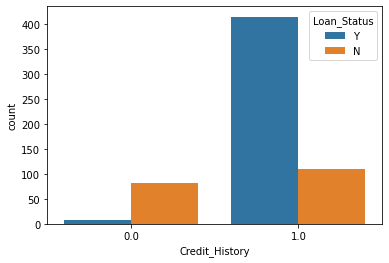

In [78]:
#credit history vs loan status
sns.countplot(x="Credit_History",hue="Loan_Status",data=cr_train)


In [79]:
#Crosstabulating the employment type and the loan status
pd.crosstab(cr_train['Self_Employed'],cr_train['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

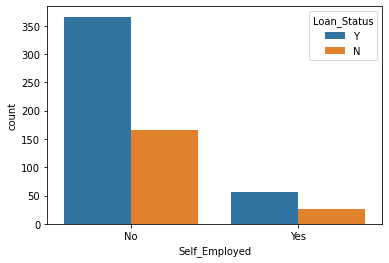

In [80]:
#self employment vs loan status
sns.countplot(x="Self_Employed",hue="Loan_Status",data=cr_train)#Crosstabulating the Gender and the loan status

In [81]:
#Crosstabulating the Propertry Area type and the loan status
pd.crosstab(cr_train['Property_Area'],cr_train['Loan_Status'])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

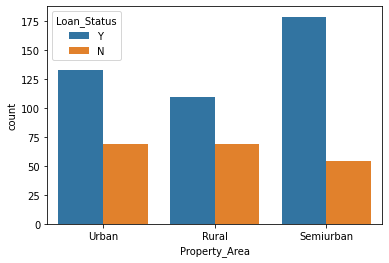

In [82]:
#Property area type vs Loan status
sns.countplot(x="Property_Area",hue="Loan_Status",data=cr_train)



In [83]:
#central value for co applicant income

cr_train['CoapplicantIncome'].median()


1188.5

<AxesSubplot:ylabel='Frequency'>

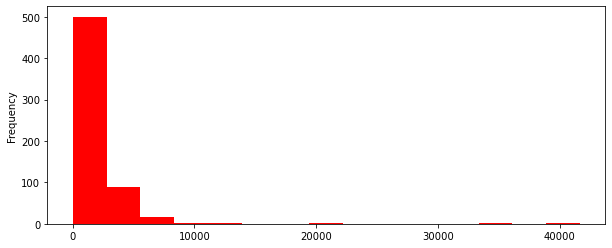

In [84]:
#Co applicant income histogram and binning 
cr_train['CoapplicantIncome'].plot.hist(bins=15,figsize=(10,4),color="red")

In [85]:
#central value for Loan Amount

cr_train['LoanAmount'].median()


128.0

In [86]:
#central value for Loan amount term

cr_train['Loan_Amount_Term'].median()

360.0

<AxesSubplot:ylabel='Frequency'>

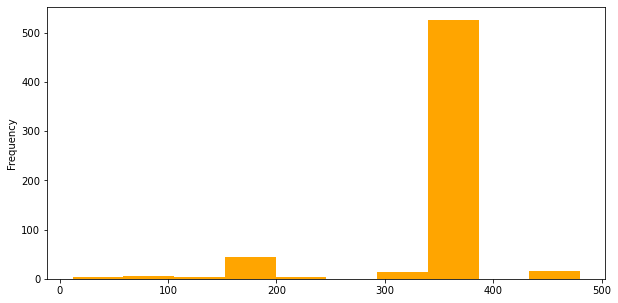

In [87]:
cr_train['Loan_Amount_Term'].plot.hist(bins=10,figsize=(10,5),color="orange")

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

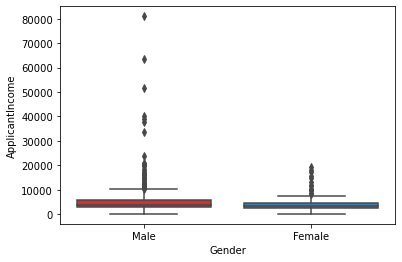

In [88]:
sns.boxplot(x="Gender",y="ApplicantIncome",data=cr_train,palette="Set1")

In [89]:
# Creating the Logistic Regression Model

cr_train_dummy_cod.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [109]:
#Segregating the input and the output variable by dropping 
# the Loan status column from the cr_traing dummy dataset

cr_train_inp=cr_train_dummy_cod.drop(['Loan_Status_Y'],axis=1)

cr_train_out=cr_train_dummy_cod['Loan_Status_Y']

In [110]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(cr_train_inp,cr_train_out)


LogisticRegression()

In [92]:
cr_train_dummy_cod.shape

(614, 15)

In [93]:
cr_valid_dummy_cod.shape

(367, 14)

In [94]:
cr_test_dummy_cod.shape

(367, 14)

In [95]:
cr_valid_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Male              367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_1             367 non-null    uint8  
 8   Dependents_2             367 non-null    uint8  
 9   Dependents_3+            367 non-null    uint8  
 10  Education_Not Graduate   367 non-null    uint8  
 11  Self_Employed_Yes        367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
dtypes: float64(3), int64(2), u

In [96]:
cr_test_dummy_cod.shape

(367, 14)

In [97]:
cr_train_dummy_cod.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [98]:
cr_test_dummy_cod.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [99]:
import statsmodels.api as sm
logit_model=sm.Logit(cr_train_out,cr_train_inp)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                            Results: Logit
Model:                  Logit               Pseudo R-squared:    inf   
Dependent Variable:     Loan_Status_Y       AIC:                 inf   
Date:                   2022-04-08 20:18    BIC:                 inf   
No. Observations:       614                 Log-Likelihood:      -inf  
Df Model:               13                  LL-Null:             0.0000
Df Residuals:           600                 LLR p-value:         1.0000
Converged:              1.0000              Scale:               1.0000
No. Iterations:         6.0000                                         
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
ApplicantIncome          0.0000   0.0000  0.1295 0.8969 -0.0000  0.0

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [100]:
prediction=log_reg.predict(cr_valid_dummy_cod)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [101]:
cr_valid_dummy_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Male              367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_1             367 non-null    uint8  
 8   Dependents_2             367 non-null    uint8  
 9   Dependents_3+            367 non-null    uint8  
 10  Education_Not Graduate   367 non-null    uint8  
 11  Self_Employed_Yes        367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
dtypes: float64(3), int64(2), u

In [113]:
log_reg.predict_proba(cr_test_dummy_cod)

array([[0.1877905 , 0.8122095 ],
       [0.27225938, 0.72774062],
       [0.19277839, 0.80722161],
       [0.1710643 , 0.8289357 ],
       [0.35462823, 0.64537177],
       [0.36163289, 0.63836711],
       [0.26295456, 0.73704544],
       [0.89248836, 0.10751164],
       [0.11274511, 0.88725489],
       [0.25840958, 0.74159042],
       [0.35976331, 0.64023669],
       [0.16769974, 0.83230026],
       [0.1101032 , 0.8898968 ],
       [0.6946009 , 0.3053991 ],
       [0.13622071, 0.86377929],
       [0.32535415, 0.67464585],
       [0.20148382, 0.79851618],
       [0.12012165, 0.87987835],
       [0.34606655, 0.65393345],
       [0.07213454, 0.92786546],
       [0.36824204, 0.63175796],
       [0.16846815, 0.83153185],
       [0.24337134, 0.75662866],
       [0.35907701, 0.64092299],
       [0.29643169, 0.70356831],
       [0.97420074, 0.02579926],
       [0.16951533, 0.83048467],
       [0.2818854 , 0.7181146 ],
       [0.100328  , 0.899672  ],
       [0.13107187, 0.86892813],
       [0.

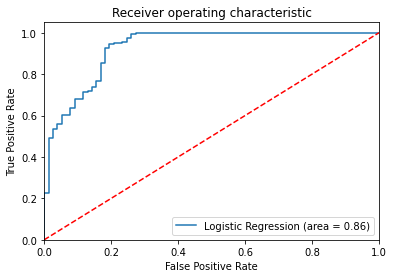

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Valid_Loan_Status, log_reg.predict(cr_test_dummy_cod))
fpr, tpr, thresholds = roc_curve(Valid_Loan_Status, log_reg.predict_proba(cr_test_dummy_cod)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [103]:
prediction_test=log_reg.predict(cr_test_dummy_cod)
prediction_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [104]:
os.listdir()

['.ipynb_checkpoints',
 'Credit_Risk_Test_data.csv',
 'Credit_Risk_Train_data.csv',
 'Credit_Risk_Validate_data.csv',
 'Logistic_Regression_Final-Copy1.ipynb',
 'Logistic_Regression_Final.ipynb',
 'Log_reg_Imarticus_New.py',
 'Log_ROC.png']

In [105]:
cr_valid_dummy_cod.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [106]:
prediction=log_reg.predict(cr_valid_dummy_cod)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [107]:
# Model Evaluation using performance measures

from sklearn.metrics import classification_report

In [108]:
#Performance measures/ratios
classification_report(Valid_Loan_Status,prediction)


'              precision    recall  f1-score   support\n\n           0       0.95      0.74      0.83        77\n           1       0.93      0.99      0.96       290\n\n    accuracy                           0.94       367\n   macro avg       0.94      0.86      0.90       367\nweighted avg       0.94      0.94      0.93       367\n'

In [109]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

In [110]:
confusion_matrix(Valid_Loan_Status,prediction)

array([[ 57,  20],
       [  3, 287]], dtype=int64)

In [111]:
# Reporting the final accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(Valid_Loan_Status,prediction)*100

93.73297002724796

In [112]:
# Add a column for the predicted class in the test data set
cr_test['Predictions']=prediction_test

In [113]:
cr_test.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predictions
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,1
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,1
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,0
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban,1
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,1
